In [1]:
import pickle
import numpy as np

k = 100
q2q_dist = pickle.load(open('/dk/lcj_rag/pyserini-autofusion/experiments/curated/test/curated_test_q2q_ddist.pkl', 'rb'))[:, :k]
q2d_sdist = pickle.load(open('/dk/lcj_rag/pyserini-autofusion/experiments/curated/test/curated_test_q2d_sdist.pkl', 'rb'))[:, :k]
q2d_ddist = pickle.load(open('/dk/lcj_rag/pyserini-autofusion/experiments/curated/test/curated_test_q2d_ddist.pkl', 'rb'))[:, :k]
print(q2q_dist.shape, q2d_sdist.shape, q2d_ddist.shape)

# X_np = np.concatenate((q2q_dist, q2d_sdist, q2d_ddist), axis=1)
X_np = np.concatenate((q2q_dist, q2d_sdist), axis=1)
# X_np = np.concatenate((q2d_sdist, q2d_ddist), axis=1)
# X_np = np.concatenate((q2q_dist, q2d_ddist), axis=1)
# X_np = (q2d_sdist)
# X_np = (q2q_dist)
print(X_np.shape)


(694, 100) (694, 100) (694, 100)
(694, 200)


In [16]:
import csv
import pickle
import numpy as np
import ast
from tqdm import tqdm

hit_file = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/curated_test/run.dpr.curated-test.fusion.all-alpha.nq--1.k-100.res.test'
hits = []
with open(hit_file, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    lines = list(reader)
    for i in range(len(lines)):
        hit = lines[i][1]
        hit = hit.replace('hits: ', '')
        hit = ast.literal_eval(hit)
        hits.append(hit)


import lightgbm as lgb

class_name = 'class123'
model_name = f'q2q_ddist.q2d_sdist.k-{k}.{class_name}.round-7500.txt'
# model_name = 'q2q_ddist.q2d_sdist.q2d_ddist.k-100.round-7500.txt'

"""
model_name: q2q_ddist.q2d_sdist.k-100.class23.round-7500.txt
len(best_costs_recalls): 68
[(0, 0.8183538315988647), (8, 0.8182592242194892), (64, 0.8184484389782403), (69, 0.8185430463576159), (92, 0.8187322611163671), (106, 0.8186376537369915), (141, 0.8188268684957427), (185, 0.8189214758751182), (210, 0.8190160832544938), (254, 0.8191106906338694), (265, 0.819205298013245), (289, 0.8192999053926207), (398, 0.8194891201513718), (431, 0.8197729422894986), (446, 0.8200567644276253), (470, 0.8201513718070009), (499, 0.8204351939451278), (525, 0.8205298013245033), (571, 0.8208136234626301), (597, 0.8210028382213813), (647, 0.8215704824976349), (711, 0.8216650898770104), (752, 0.8218543046357616), (822, 0.8221381267738883), (871, 0.8222327341532639), (930, 0.8227057710501419), (990, 0.8231788079470199), (1061, 0.8235572374645223), (1144, 0.8243140964995269), (1248, 0.8240302743614002), (1407, 0.8251655629139073), (1552, 0.8258278145695365), (1661, 0.82639545884579), (1805, 0.8265846736045411), (1985, 0.8280983916745506), (2135, 0.8292336802270577), (2285, 0.8301797540208137), (2364, 0.8307473982970671), (2462, 0.8315988647114475), (2556, 0.8318826868495742), (2618, 0.8322611163670767), (2671, 0.8324503311258278), (2756, 0.8332071901608326), (2836, 0.8333964049195838), (2955, 0.8340586565752128), (3086, 0.834247871333964), (3242, 0.8344370860927153), (3510, 0.8352885525070955), (3622, 0.8353831598864712), (3710, 0.8351939451277199), (3801, 0.8354777672658468), (4266, 0.8366130558183539), (4380, 0.836802270577105), (4531, 0.8371807000946074), (4838, 0.8372753074739829), (4870, 0.8370860927152318), (5016, 0.8373699148533585), (5107, 0.8376537369914854), (5233, 0.8381267738883633), (5256, 0.8382213812677389), (5862, 0.8395458845789971), (6020, 0.8400189214758751), (6793, 0.8408703878902555), (6835, 0.8407757805108799), (7165, 0.8412488174077578), (8333, 0.841911069063387), (9118, 0.8418164616840114), (10570, 0.8415326395458845)]
max recall: 0.841911069063387 | at cost: 0.7883632923368022
area under the curve: 0.8357034197390197
"""

"""
model_name: q2q_ddist.q2d_sdist.k-100.class123.round-7500.txt
len(best_costs_recalls): 61
[(0, 0.8183538315988647), (6, 0.8182592242194892), (28, 0.8181646168401135), (69, 0.8184484389782403), (83, 0.8185430463576159), (108, 0.8186376537369915), (134, 0.8187322611163671), (143, 0.8188268684957427), (188, 0.8189214758751182), (234, 0.819205298013245), (250, 0.8195837275307474), (273, 0.8194891201513718), (289, 0.819678334910123), (335, 0.8197729422894986), (350, 0.8199621570482498), (474, 0.8203405865657522), (515, 0.8209082308420057), (592, 0.8211920529801324), (619, 0.8210974456007568), (656, 0.8213812677388836), (677, 0.821286660359508), (716, 0.821759697256386), (749, 0.8220435193945128), (857, 0.8230842005676443), (1039, 0.8232734153263954), (1154, 0.8237464522232734), (1234, 0.8240302743614002), (1350, 0.8248817407757805), (1463, 0.8260170293282876), (1549, 0.8265846736045411), (1665, 0.8271523178807947), (1828, 0.828476821192053), (1944, 0.8295175023651845), (2104, 0.830558183538316), (2202, 0.8312204351939452), (2288, 0.8320719016083254), (2582, 0.832639545884579), (2861, 0.8334910122989593), (3015, 0.8344370860927153), (3117, 0.8341532639545884), (3304, 0.834720908230842), (3369, 0.8349101229895932), (3460, 0.8351939451277199), (3557, 0.8355723746452224), (3665, 0.8356669820245979), (4204, 0.8368968779564806), (4365, 0.836802270577105), (4485, 0.8369914853358562), (4632, 0.8372753074739829), (4672, 0.8371807000946074), (5073, 0.8375591296121098), (5130, 0.8381267738883633), (5547, 0.838883632923368), (5597, 0.8392620624408704), (5718, 0.8394512771996215), (6484, 0.8403027436140019), (6754, 0.8406811731315043), (7090, 0.8411542100283822), (8338, 0.8418164616840114), (8341, 0.8416272469252601), (10570, 0.8415326395458845)]
max recall: 0.8418164616840114 | at cost: 0.7888363292336802
area under the curve: 0.8358575662184528
"""


"""
model_name: q2q_ddist.q2d_sdist.k-200.class23.round-7500.txt
len(best_costs_recalls): 70
[(0, 0.8183538315988647), (15, 0.8184484389782403), (49, 0.8185430463576159), (52, 0.8186376537369915), (71, 0.8187322611163671), (133, 0.8188268684957427), (137, 0.8189214758751182), (145, 0.8190160832544938), (160, 0.8191106906338694), (166, 0.8192999053926207), (183, 0.8193945127719963), (204, 0.8195837275307474), (223, 0.8194891201513718), (242, 0.819678334910123), (274, 0.8198675496688742), (285, 0.8199621570482498), (319, 0.8201513718070009), (347, 0.8202459791863765), (379, 0.8203405865657522), (503, 0.8214758751182593), (561, 0.8216650898770104), (589, 0.821759697256386), (622, 0.8219489120151372), (651, 0.8220435193945128), (733, 0.8227057710501419), (817, 0.8231788079470199), (898, 0.8237464522232734), (956, 0.8241248817407758), (1028, 0.8242194891201514), (1052, 0.8244087038789025), (1164, 0.8250709555345317), (1265, 0.825449385052034), (1426, 0.8252601702932829), (1550, 0.8260170293282876), (1714, 0.8270577105014191), (1791, 0.8277199621570482), (1863, 0.8281929990539262), (2071, 0.828476821192053), (2142, 0.8287606433301797), (2233, 0.8294228949858089), (2400, 0.8303689687795648), (2468, 0.830558183538316), (2553, 0.8313150425733207), (2651, 0.8321665089877011), (2708, 0.832639545884579), (2861, 0.8334910122989593), (3013, 0.8339640491958372), (3150, 0.8348155156102176), (3301, 0.8349101229895932), (3394, 0.8354777672658468), (3494, 0.8360454115421003), (3950, 0.836802270577105), (4136, 0.8370860927152318), (4259, 0.8378429517502365), (4366, 0.8381267738883633), (4459, 0.8383159886471144), (4730, 0.8382213812677389), (4917, 0.8379375591296121), (5386, 0.8387890255439925), (5445, 0.838883632923368), (5517, 0.8390728476821192), (6415, 0.8397350993377484), (6521, 0.8399243140964995), (6588, 0.8400189214758751), (6761, 0.8401135288552507), (6805, 0.8403027436140019), (6936, 0.8403973509933775), (8188, 0.8410596026490066), (8853, 0.8412488174077578), (10570, 0.8415326395458845)]
max recall: 0.8415326395458845 | at cost: 1.0
area under the curve: 0.8357430975547977
"""

"""
model_name: q2q_ddist.q2d_sdist.k-200.class123.round-7500.txt
len(best_costs_recalls): 74
[(0, 0.8183538315988647), (20, 0.8184484389782403), (21, 0.8185430463576159), (25, 0.8186376537369915), (44, 0.8187322611163671), (53, 0.8188268684957427), (60, 0.8189214758751182), (67, 0.8190160832544938), (93, 0.8191106906338694), (142, 0.8192999053926207), (194, 0.8194891201513718), (215, 0.8193945127719963), (275, 0.819678334910123), (299, 0.8197729422894986), (323, 0.8199621570482498), (344, 0.8200567644276253), (368, 0.8203405865657522), (391, 0.8206244087038789), (451, 0.8211920529801324), (478, 0.821286660359508), (525, 0.8215704824976349), (561, 0.8219489120151372), (652, 0.8221381267738883), (711, 0.8222327341532639), (813, 0.8227057710501419), (877, 0.823368022705771), (972, 0.823841059602649), (1030, 0.8243140964995269), (1129, 0.8246925260170294), (1201, 0.8256385998107852), (1289, 0.8263008514664144), (1349, 0.82639545884579), (1425, 0.8270577105014191), (1500, 0.8277199621570482), (1582, 0.8274361400189215), (1681, 0.8279091769157995), (1782, 0.8281929990539262), (1932, 0.8292336802270577), (2032, 0.8295175023651845), (2103, 0.8298013245033112), (2195, 0.8300851466414381), (2274, 0.8302743614001892), (2412, 0.830558183538316), (2547, 0.8315988647114475), (2669, 0.8319772942289498), (2759, 0.8325449385052034), (2880, 0.8328287606433302), (3139, 0.8343424787133397), (3272, 0.8349101229895932), (3341, 0.8350993377483443), (3501, 0.8354777672658468), (3557, 0.8355723746452224), (3916, 0.8365184484389783), (4036, 0.8368968779564806), (4082, 0.8369914853358562), (4217, 0.8373699148533585), (4251, 0.8372753074739829), (4338, 0.8376537369914854), (4426, 0.8377483443708609), (4556, 0.8378429517502365), (4764, 0.8382213812677389), (4825, 0.8385052034058657), (5218, 0.8390728476821192), (5268, 0.8389782403027436), (5322, 0.838883632923368), (5407, 0.8386944181646169), (5515, 0.8385998107852413), (6315, 0.839829706717124), (6555, 0.8401135288552507), (6740, 0.8403973509933775), (6840, 0.8405865657521286), (8188, 0.8410596026490066), (8853, 0.8412488174077578), (10570, 0.8415326395458845)]
max recall: 0.8415326395458845 | at cost: 1.0
area under the curve: 0.8358284992870881
"""

model = lgb.Booster(model_file=f'/dk/lcj_rag/pyserini-autofusion/experiments/squad/train/{model_name}')
# model = lgb.Booster(model_file=f'/dk/lcj_rag/pyserini-autofusion/experiments/traindata/q2q_ddist.q2d_sdist.k-100.class123.round-7500.txt')

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

costs_recalls = []

# for threshold in tqdm(np.arange(0.0, 1.0, 0.0005)): 
for threshold in tqdm(np.arange(0.0, 0.15, 0.00025)):

    y_pred = model.predict(X_np)
    y_pred = (y_pred >= threshold).astype(bool)

    class0 = []
    class1 = []
    class2 = []
    class3 = []
    class4 = []
    class5 = []
    class6 = []
    class_hardfail = []

    num_success = 0
    dense_cost = 0


    # (qid, hits, softmax_hits, weights)
    for i in range(len(lines)):
        # print(i, hits)

        # use hit[0] instead of hit[1]
        if y_pred[i]:
            dense_cost += 1
            if hits[i][1]:
                num_success += 1
        else:
            if hits[i][2]:
                num_success += 1

    recall = num_success / len(lines)
    costs_recalls.append((dense_cost, recall))


100%|██████████| 600/600 [00:12<00:00, 47.72it/s]


In [4]:
import joblib
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import csv
import ast
from tqdm import tqdm

alpha_file = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/curated_test/run.dpr.curated-test.fusion.all-alpha.nq--1.k-100.res.test'
hits = []
with open(alpha_file, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    lines = list(reader)
    for i in range(len(lines)):
        hit = lines[i][1]
        hit = hit.replace('hits: ', '')
        hit = ast.literal_eval(hit)
        hits.append(hit)

model_name = 'mlp_q2q_ddist_q2d_sdist_k-100_round-500.pkl'
# model = joblib.load(f'/dk/lcj_rag/pyserini-autofusion/experiments/squad/train/{model_name}')
model = joblib.load(f'/dk/lcj_rag/pyserini-autofusion/experiments/traindata/{model_name}')

costs_recalls = []

# for threshold in tqdm(np.arange(0.0, 1.0, 0.0005)): 
# for threshold in tqdm(np.arange(0.0, 1.0, 0.005)):
for threshold in tqdm(np.arange(0.0, 0.25, 0.00025)):

    y_pred_proba = model.predict_proba(X_np)[:, 1]  # 获取正类的概率
    y_pred = (y_pred_proba > threshold).astype(bool)

    num_success = 0
    dense_cost = 0

    # (qid, hits, softmax_hits, weights)
    for i in range(len(lines)):
        # print(i, hits)

        # use hit[0] instead of hit[1]
        if y_pred[i]:
            dense_cost += 1
            if hits[i][1]:
                num_success += 1
        else:
            if hits[i][2]:
                num_success += 1

    recall = num_success / len(lines)
    costs_recalls.append((dense_cost, recall))

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:08<00:00, 120.12it/s]


model_name: mlp_q2q_ddist_q2d_sdist_k-100_round-500.pkl
len(best_costs_recalls): 159
[(0, 0.899135446685879), (1, 0.899135446685879), (2, 0.9005763688760807), (3, 0.9005763688760807), (4, 0.9005763688760807), (6, 0.9005763688760807), (8, 0.9005763688760807), (12, 0.9005763688760807), (14, 0.9034582132564841), (15, 0.9034582132564841), (18, 0.9048991354466859), (19, 0.9048991354466859), (21, 0.9048991354466859), (23, 0.9048991354466859), (25, 0.9048991354466859), (28, 0.9063400576368876), (30, 0.9063400576368876), (32, 0.9063400576368876), (35, 0.9063400576368876), (36, 0.9063400576368876), (37, 0.9063400576368876), (41, 0.9063400576368876), (46, 0.9063400576368876), (50, 0.9063400576368876), (53, 0.9063400576368876), (56, 0.909221902017291), (59, 0.909221902017291), (64, 0.909221902017291), (65, 0.909221902017291), (71, 0.9106628242074928), (81, 0.9106628242074928), (84, 0.9106628242074928), (90, 0.9121037463976945), (94, 0.9121037463976945), (101, 0.9121037463976945), (109, 0.91354466

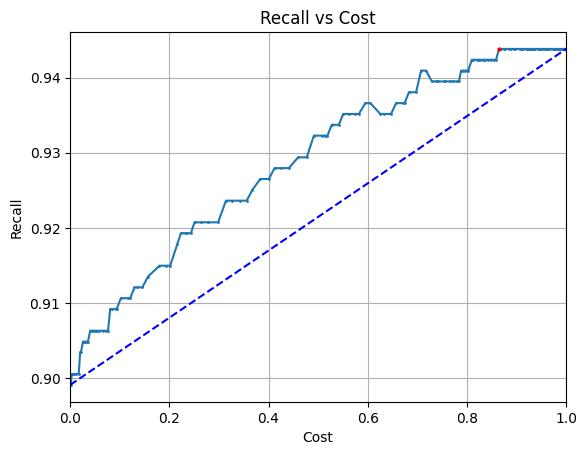

In [5]:
import matplotlib.pyplot as plt
from scipy import integrate

costs_recalls = set(costs_recalls)

# recalls_set = set([x[1] for x in costs_recalls])
# best_costs_recalls = set()
# for recall in recalls_set:
#     best_costs_recalls.add(min([x for x in costs_recalls if x[1] == recall]))
# best_costs_recalls = sorted(list(best_costs_recalls), key=lambda x: x[0])

costs_set = set([x[0] for x in costs_recalls])
best_costs_recalls = set()
for cost in costs_set:
    best_costs_recalls.add(max([x for x in costs_recalls if x[0] == cost]))
best_costs_recalls = sorted(list(best_costs_recalls), key=lambda x: x[0])


print(f'model_name: {model_name}')
print(f'len(best_costs_recalls): {len(best_costs_recalls)}')
print(best_costs_recalls)

costs = [x[0] / 694 for x in best_costs_recalls]
recalls = [x[1] / 1 for x in best_costs_recalls]
# recalls = [x[1] / 0.8425 for x in best_costs_recalls]

max_recall_index = recalls.index(max(recalls))
min_recall_index = recalls.index(min(recalls))
max_recall = max(recalls)
min_recall = min(recalls)

print(f'max recall: {max_recall} | at cost: {costs[max_recall_index]}')
print(f'min recall: {min_recall} | at cost: {costs[min_recall_index]}')

# rrf 100%: 0.8425
area = integrate.trapezoid(recalls, costs)
print("area under the curve:", area)


plt.plot(costs, recalls, marker='o', linestyle='-', markersize=1)
plt.plot(costs[max_recall_index], recalls[max_recall_index], marker='o', markersize=2, color='red')

plt.plot([costs[0], costs[-1]], [min_recall, max_recall], linestyle='--', color='blue')
x = np.array([0., 1.])
y = np.array([0.899135446685879, 0.9438040345821326])
area_baseline = np.trapz(y, x)
print("area under the baseline:", area_baseline)

plt.title('Recall vs Cost')
plt.xlim(0, 1)
plt.xlabel('Cost')
plt.ylabel('Recall')
plt.grid(True)
plt.show()
